In [137]:
from sklearn.linear_model import LassoCV
from sklearn import linear_model
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.model_selection as cv
from sklearn.metrics import mean_squared_error

In [147]:
full = pd.read_csv("train.csv")

In [148]:
full.head()

,ABV,appearance,aroma,overall,palate,taste,userBias,word_count,char_count,avg_word_len,...,Spain,Sri Lanka,Sweden,Switzerland,"Taiwan, Province of China",Thailand,Togo,United Kingdom,United States,Location Unknown
0,0.092014,0.7,0.750,1.0,0.750,0.875,0.745000,0.135593,0.135916,0.312620,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.192708,0.8,1.000,1.0,1.000,1.000,0.766250,0.238418,0.232877,0.270866,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.111111,0.8,0.875,1.0,0.875,0.875,0.775000,0.114124,0.119221,0.425918,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.123264,0.8,0.875,1.0,0.750,0.875,0.711000,0.213559,0.221747,0.344344,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.175347,0.8,0.875,1.0,0.875,0.875,0.755556,0.211299,0.209332,0.288806,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [149]:
data = full.select_dtypes(include=[np.number]).fillna(0)
data.head()

,ABV,appearance,aroma,overall,palate,taste,userBias,word_count,char_count,avg_word_len,...,Spain,Sri Lanka,Sweden,Switzerland,"Taiwan, Province of China",Thailand,Togo,United Kingdom,United States,Location Unknown
0,0.092014,0.7,0.750,1.0,0.750,0.875,0.745000,0.135593,0.135916,0.312620,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.192708,0.8,1.000,1.0,1.000,1.000,0.766250,0.238418,0.232877,0.270866,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.111111,0.8,0.875,1.0,0.875,0.875,0.775000,0.114124,0.119221,0.425918,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.123264,0.8,0.875,1.0,0.750,0.875,0.711000,0.213559,0.221747,0.344344,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.175347,0.8,0.875,1.0,0.875,0.875,0.755556,0.211299,0.209332,0.288806,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [150]:
appearance = data
appearance = appearance.drop("appearance", axis=1)
appearance = appearance.drop("aroma",axis=1)
appearance = appearance.drop("overall",axis=1)
appearance = appearance.drop("palate", axis = 1)
appearance = appearance.drop("taste", axis = 1)
yval_appearance = data['appearance']

In [153]:
aroma = data
aroma = aroma.drop("appearance",axis=1)
aroma = aroma.drop("aroma",axis=1)
aroma = aroma.drop("overall",axis=1)
aroma = aroma.drop("palate", axis = 1)
aroma = aroma.drop("taste", axis = 1)
yval_aroma = data['aroma']

In [155]:
overall = data
overall = overall.drop("appearance",axis=1)
overall = overall.drop("aroma",axis=1)
overall = overall.drop("overall",axis=1)
overall = overall.drop("palate", axis = 1)
overall = overall.drop("taste", axis = 1)
yval_overall = data['overall']

In [118]:
palate = data
palate = palate.drop("appearance",axis=1)
palate = palate.drop("aroma",axis=1)
palate = palate.drop("overall", axis = 1)
palate = palate.drop("palate", axis = 1)
palate = palate.drop("taste", axis = 1)
yval_palate = data['palate']

In [119]:
taste = data
taste = taste.drop("appearance",axis=1)
taste = taste.drop("aroma",axis=1)
taste = taste.drop("overall", axis = 1)
taste = taste.drop("palate", axis = 1)
taste = taste.drop("taste", axis=1)
yval_taste = data['taste']

In [120]:
alphas = np.logspace(-3, -1, len(list(appearance)))

def SSE(X, y, betaHat):
    return np.sum((y-np.matmul(X, betaHat))**2)

In [121]:
reg_appearance = LassoCV(alphas = alphas, max_iter = 50000, cv = 25).fit(appearance, yval_appearance)
appearanceSSE = SSE(appearance, yval_appearance, reg_appearance.coef_)/appearance.shape[0]
print(appearanceSSE)

0.177597751235


Text(0,0.5,'Score')

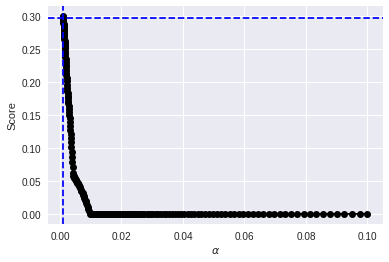

In [123]:
import matplotlib.pyplot as plt
X_train, X_test, y_train, y_test = cv.train_test_split(appearance, yval_appearance, test_size=0.25, random_state=0)
lassocv_score = reg_appearance.score(appearance, yval_appearance)
lassocv_alpha = reg_appearance.alpha_
scores = np.empty_like(alphas)
mse = np.empty_like(alphas)
for i,a in enumerate(alphas):
    lasso = linear_model.Lasso()
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    scores[i] = lasso.score(X_test, y_test)
    mse[i] = mean_squared_error(y_test, lasso.predict(X_test))
    
plt.plot(alphas, scores, '-ko')
plt.axhline(lassocv_score, color='b', ls='--')
plt.axvline(lassocv_alpha, color='b', ls='--')
plt.xlabel(r'$\alpha$')
plt.ylabel('Score')

In [67]:
reg_aroma = LassoCV(alphas = alphas, max_iter = 10000, cv = 20).fit(aroma, yval_aroma)
aromaSSE = SSE(aroma, yval_aroma, reg_aroma.coef_)/aroma.shape[0]
print(aromaSSE)

0.0168377280184


Text(0,0.5,'Score')

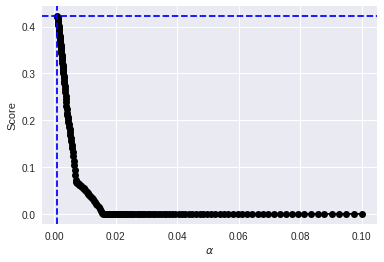

In [68]:
X_train, X_test, y_train, y_test = cv.train_test_split(aroma, yval_aroma, test_size=0.25, random_state=0)
lassocv_score = reg_aroma.score(aroma, yval_aroma)
lassocv_alpha = reg_aroma.alpha_
scores = np.empty_like(alphas)
for i,a in enumerate(alphas):
    lasso = linear_model.Lasso()
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    scores[i] = lasso.score(X_test, y_test)
plt.plot(alphas, scores, '-ko')
plt.axhline(lassocv_score, color='b', ls='--')
plt.axvline(lassocv_alpha, color='b', ls='--')
plt.xlabel(r'$\alpha$')
plt.ylabel('Score')


In [69]:
reg_overall = LassoCV(alphas = alphas, max_iter = 10000, cv = 20).fit(overall, yval_overall)
overallSSE = SSE(overall, yval_overall, reg_overall.coef_)/overall.shape[0]
print(overallSSE)

0.0206269149441


Text(0,0.5,'Score')

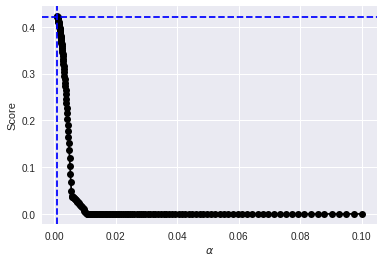

In [70]:
X_train, X_test, y_train, y_test = cv.train_test_split(overall, yval_overall, test_size=0.25, random_state=0)
lassocv_score = reg_overall.score(overall, yval_overall)
lassocv_alpha = reg_overall.alpha_
scores = np.empty_like(alphas)
for i,a in enumerate(alphas):
    lasso = linear_model.Lasso()
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    scores[i] = lasso.score(X_test, y_test)
plt.plot(alphas, scores, '-ko')
plt.axhline(lassocv_score, color='b', ls='--')
plt.axvline(lassocv_alpha, color='b', ls='--')
plt.xlabel(r'$\alpha$')
plt.ylabel('Score')

In [71]:
reg_palate = LassoCV(alphas = alphas, max_iter = 20000, cv = 20).fit(palate, yval_palate)
palateSSE = SSE(palate, yval_palate, reg_palate.coef_)/palate.shape[0]
print(palateSSE)

0.0189832775884


Text(0,0.5,'Score')

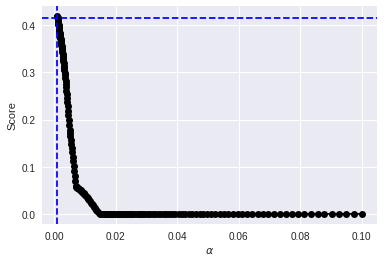

In [72]:
X_train, X_test, y_train, y_test = cv.train_test_split(palate, yval_palate, test_size=0.25, random_state=0)
lassocv_score = reg_palate.score(palate, yval_palate)
lassocv_alpha = reg_palate.alpha_
scores = np.empty_like(alphas)
for i,a in enumerate(alphas):
    lasso = linear_model.Lasso()
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    scores[i] = lasso.score(X_test, y_test)
plt.plot(alphas, scores, '-ko')
plt.axhline(lassocv_score, color='b', ls='--')
plt.axvline(lassocv_alpha, color='b', ls='--')
plt.xlabel(r'$\alpha$')
plt.ylabel('Score')

In [73]:
reg_taste = LassoCV(alphas = alphas, max_iter = 10000, cv = 20).fit(taste, yval_taste)
tasteSSE = SSE(taste, yval_taste, reg_taste.coef_)/taste.shape[0]
print(tasteSSE)

0.0474047402429


Text(0,0.5,'Score')

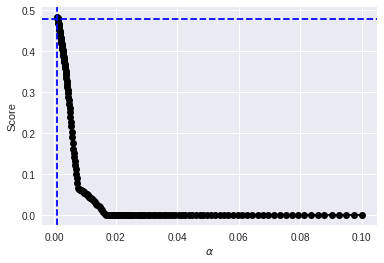

In [74]:
X_train, X_test, y_train, y_test = cv.train_test_split(taste, yval_taste, test_size=0.25, random_state=0)
lassocv_score = reg_taste.score(taste, yval_taste)
lassocv_alpha = reg_taste.alpha_
scores = np.empty_like(alphas)
for i,a in enumerate(alphas):
    lasso = linear_model.Lasso()
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    scores[i] = lasso.score(X_test, y_test)
plt.plot(alphas, scores, '-ko')
plt.axhline(lassocv_score, color='b', ls='--')
plt.axvline(lassocv_alpha, color='b', ls='--')
plt.xlabel(r'$\alpha$')
plt.ylabel('Score')

In [75]:
def find_zero_coef(startList, coef): 
    for i in range(len(coef)):
        if coef[i] == 0:
            startList.append(i)
    

In [76]:
dropListAppearance = []
dropListAroma = []
dropListOverall = []
dropListPalate = []
dropListTaste = []

find_zero_coef(dropListAppearance, reg_appearance.coef_)
find_zero_coef(dropListAroma, reg_aroma.coef_)
find_zero_coef(dropListOverall, reg_overall.coef_)
find_zero_coef(dropListPalate, reg_palate.coef_)
find_zero_coef(dropListTaste, reg_taste.coef_)


In [77]:
appearance = appearance.drop(appearance.columns[dropListAppearance], axis = 1)
appearanceCoef = np.delete(reg_appearance.coef_, dropListAppearance)
appearanceBIC = appearance.shape[0]*np.log(SSE(appearance, yval_appearance, appearanceCoef)/appearance.shape[0]) + appearance.shape[1]*np.log(appearance.shape[0])


In [78]:
aroma = aroma.drop(aroma.columns[dropListAroma], axis = 1)
aromaCoef = np.delete(reg_aroma.coef_, dropListAroma)
aromaBIC = aroma.shape[0]*np.log(SSE(aroma, yval_aroma, aromaCoef)/aroma.shape[0]) + aroma.shape[1]*np.log(aroma.shape[0])


In [79]:
overall = overall.drop(overall.columns[dropListOverall], axis = 1)
overallCoef = np.delete(reg_overall.coef_, dropListOverall)
overallBIC = overall.shape[0]*np.log(SSE(overall, yval_overall, overallCoef)/overall.shape[0]) + overall.shape[1]*np.log(overall.shape[0])


In [80]:
palate = palate.drop(palate.columns[dropListPalate], axis = 1)
palateCoef = np.delete(reg_palate.coef_, dropListPalate)
palateBIC = palate.shape[0]*np.log(SSE(palate, yval_palate, palateCoef)/palate.shape[0]) + palate.shape[1]*np.log(palate.shape[0])


In [81]:
taste = taste.drop(taste.columns[dropListTaste], axis = 1)
tasteCoef = np.delete(reg_taste.coef_, dropListTaste)
tasteBIC = taste.shape[0]*np.log(SSE(taste, yval_taste, tasteCoef)/taste.shape[0]) + taste.shape[1]*np.log(taste.shape[0])


In [82]:
print(appearanceBIC)

-64692.9260842


In [83]:
print(aromaBIC)

-152954.884986


In [84]:
print(overallBIC)

-145480.251371


In [85]:
print(palateBIC)

-148520.463285


In [86]:
print(tasteBIC)

-114191.290034


In [87]:
appearance.head()

,userBias,avg_sent,American Double / Imperial IPA,American Double / Imperial Stout,American IPA,Euro Pale Lager,Fruit / Vegetable Beer,Light Lager,Rauchbier,Russian Imperial Stout,Rye Beer
0,0.745000,0.494144,0,0,0,0,0,0,1,0,0
1,0.766250,0.416718,0,1,0,0,0,0,0,0,0
2,0.775000,0.580659,0,0,1,0,0,0,0,0,0
3,0.711000,0.566334,0,0,1,0,0,0,0,0,0
4,0.755556,0.483692,0,0,0,0,0,0,0,0,0


In [88]:
aroma.head()

,ABV,userBias,char_count,avg_sent,American Double / Imperial IPA,American Double / Imperial Stout,American IPA,American Pale Ale (APA),American Porter,Czech Pilsener,English Pale Ale,Euro Pale Lager,Light Lager,Old Ale,Rauchbier,Russian Imperial Stout,Rye Beer,Scotch Ale / Wee Heavy,Netherlands
0,0.092014,0.745000,0.135916,0.494144,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0
1,0.192708,0.766250,0.232877,0.416718,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2,0.111111,0.775000,0.119221,0.580659,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0
3,0.123264,0.711000,0.221747,0.566334,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0
4,0.175347,0.755556,0.209332,0.483692,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0


In [89]:
overall.head()

,userBias,char_count,avg_sent,American Double / Imperial Stout,American IPA,Russian Imperial Stout
0,0.745000,0.135916,0.494144,0,0,0
1,0.766250,0.232877,0.416718,1,0,0
2,0.775000,0.119221,0.580659,0,1,0
3,0.711000,0.221747,0.566334,0,1,0
4,0.755556,0.209332,0.483692,0,0,0


In [90]:
palate.head()

,userBias,char_count,avg_sent,American Barleywine,American Double / Imperial IPA,American Double / Imperial Stout,American Pale Ale (APA),Euro Pale Lager,Light Lager,Old Ale,Rauchbier,Russian Imperial Stout,Scotch Ale / Wee Heavy
0,0.745000,0.135916,0.494144,0,0,0,0,0,0,0,1,0,0
1,0.766250,0.232877,0.416718,0,0,1,0,0,0,0,0,0,0
2,0.775000,0.119221,0.580659,0,0,0,0,0,0,0,0,0,0
3,0.711000,0.221747,0.566334,0,0,0,0,0,0,0,0,0,0
4,0.755556,0.209332,0.483692,0,0,0,0,0,0,0,0,0,1


In [91]:
taste.head()

,userBias,char_count,avg_sent,American Double / Imperial IPA,American Double / Imperial Stout,American Pale Ale (APA),American Porter,English Pale Ale,Euro Pale Lager,Light Lager,Old Ale,Rauchbier,Russian Imperial Stout,Scotch Ale / Wee Heavy
0,0.745000,0.135916,0.494144,0,0,0,0,0,0,0,0,1,0,0
1,0.766250,0.232877,0.416718,0,1,0,0,0,0,0,0,0,0,0
2,0.775000,0.119221,0.580659,0,0,0,0,0,0,0,0,0,0,0
3,0.711000,0.221747,0.566334,0,0,0,0,0,0,0,0,0,0,0
4,0.755556,0.209332,0.483692,0,0,0,0,0,0,0,0,0,0,1


In [97]:
reg_palate.coef_

array([ 0.        ,  0.59142016,  0.        ,  0.07176688,  0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  0.60269034,  0.        ,  0.        ,  0.        ,
        0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.00174302, -0.        , -0.        , -0.        ,
       -0.        ,  0.0313186 ,  0.        ,  0.083889  ,  0.        ,
       -0.        , -0.00633304, -0.        , -0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        , -0.        ,
        0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        , -0.        , -0.        ,  0.        , -0.        ,
       -0.        , -0.        ,  0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.  

In [98]:
reg_palate

LassoCV(alphas=array([ 0.001  ,  0.00103, ...,  0.09745,  0.1    ]),
    copy_X=True, cv=20, eps=0.001, fit_intercept=True, max_iter=20000,
    n_alphas=100, n_jobs=None, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

(2, 5)

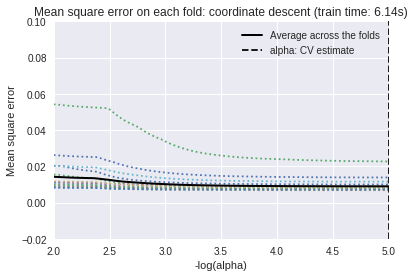

In [162]:
import time
t1 = time.time()
model = LassoCV(cv=20).fit(appearance, yval_appearance)
#model2 = LassoCV(cv=20).fit(aroma, yval_aroma)
t_lasso_cv = time.time() - t1

# Display results
m_log_alphas = -np.log10(model.alphas_)
#m2_log_alphas = -np.log10(model2.alphas_)

plt.figure()
ymin, ymax = -.02,.1
plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)

#plt.plot(m2_log_alphas, model2.mse_path_, ':')
#plt.plot(m2_log_alphas, model2.mse_path_.mean(axis=-1), 'k',
#       label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha: CV estimate')
#plt.axvline(-np.log10(model2.alpha_), linestyle='--', color='k',
#            label='alpha: CV estimate')
plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: coordinate descent '
          '(train time: %.2fs)' % t_lasso_cv)
plt.axis('tight')
plt.ylim(ymin, ymax)
plt.xlim(2,5)

(2, 5)

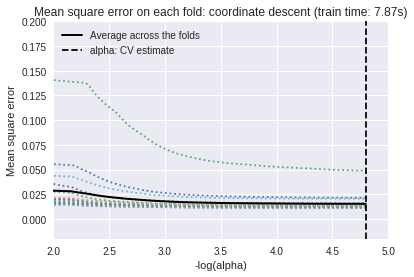

In [160]:
t1 = time.time()
model = LassoCV(cv=20).fit(aroma, yval_aroma)
#model2 = LassoCV(cv=20).fit(aroma, yval_aroma)
t_lasso_cv = time.time() - t1

# Display results
m_log_alphas = -np.log10(model.alphas_)
#m2_log_alphas = -np.log10(model2.alphas_)

plt.figure()
ymin, ymax = -.02,.2
plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)

#plt.plot(m2_log_alphas, model2.mse_path_, ':')
#plt.plot(m2_log_alphas, model2.mse_path_.mean(axis=-1), 'k',
#       label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha: CV estimate')
#plt.axvline(-np.log10(model2.alpha_), linestyle='--', color='k',
#            label='alpha: CV estimate')
plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: coordinate descent '
          '(train time: %.2fs)' % t_lasso_cv)
plt.axis('tight')
plt.ylim(ymin, ymax)
plt.xlim(2,5)

(2, 5)

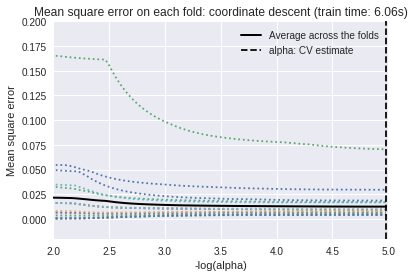

In [159]:
t1 = time.time()
model = LassoCV(cv=20).fit(overall, yval_overall)
#model2 = LassoCV(cv=20).fit(aroma, yval_aroma)
t_lasso_cv = time.time() - t1

# Display results
m_log_alphas = -np.log10(model.alphas_)
#m2_log_alphas = -np.log10(model2.alphas_)

plt.figure()
ymin, ymax = -.02,.2
plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)

#plt.plot(m2_log_alphas, model2.mse_path_, ':')
#plt.plot(m2_log_alphas, model2.mse_path_.mean(axis=-1), 'k',
#       label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha: CV estimate')
#plt.axvline(-np.log10(model2.alpha_), linestyle='--', color='k',
#            label='alpha: CV estimate')
plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: coordinate descent '
          '(train time: %.2fs)' % t_lasso_cv)
plt.axis('tight')
plt.ylim(ymin, ymax)
plt.xlim(2,5)

In [112]:
model.mse_path_

array([[ 0.02021435,  0.01542495,  0.01051916, ...,  0.02037105,
         0.02620188,  0.05418897],
       [ 0.02021435,  0.01542495,  0.01051916, ...,  0.02037105,
         0.02620188,  0.05418897],
       [ 0.02021435,  0.01542495,  0.01051916, ...,  0.02037105,
         0.02620188,  0.05418897],
       ..., 
       [ 0.01118493,  0.00918092,  0.00768986, ...,  0.01374745,
         0.01695337,  0.03593497],
       [ 0.01115366,  0.00915964,  0.00767835, ...,  0.0136882 ,
         0.01686553,  0.03551031],
       [ 0.01112369,  0.00913932,  0.00766753, ...,  0.01363153,
         0.01678157,  0.03510336]])

In [124]:
mse

array([ 0.00990286,  0.00992796,  0.00995438,  0.00998219,  0.01001146,
        0.01004218,  0.01007363,  0.01010672,  0.01014152,  0.01017814,
        0.01021666,  0.01025646,  0.01029585,  0.0103373 ,  0.01038026,
        0.01042265,  0.01046581,  0.01051119,  0.01055893,  0.01060914,
        0.01066068,  0.01071419,  0.01076832,  0.01082523,  0.01088507,
        0.010948  ,  0.01099965,  0.0110538 ,  0.01111077,  0.01117071,
        0.01123376,  0.01130009,  0.01136988,  0.0114433 ,  0.01151169,
        0.01155715,  0.01160503,  0.01165548,  0.01170864,  0.01176464,
        0.01182363,  0.01188579,  0.01195127,  0.01202025,  0.01209293,
        0.01216949,  0.01225015,  0.01233511,  0.01242462,  0.01251258,
        0.01260409,  0.01270048,  0.012802  ,  0.01290893,  0.01302156,
        0.0131402 ,  0.01326515,  0.01331601,  0.01333042,  0.01334557,
        0.01336087,  0.0133739 ,  0.01338759,  0.01340197,  0.01341707,
        0.01343293,  0.01344959,  0.0134671 ,  0.01348549,  0.01

Text(0,0.5,'MSE')

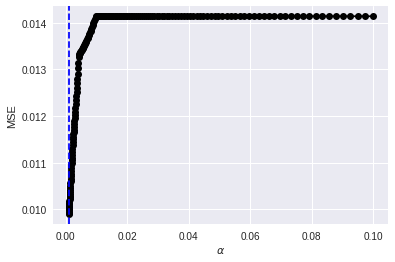

In [128]:
plt.plot(alphas, mse, '-ko')
plt.axvline(lassocv_alpha, color='b', ls='--')
plt.xlabel(r'$\alpha$')
plt.ylabel('MSE')